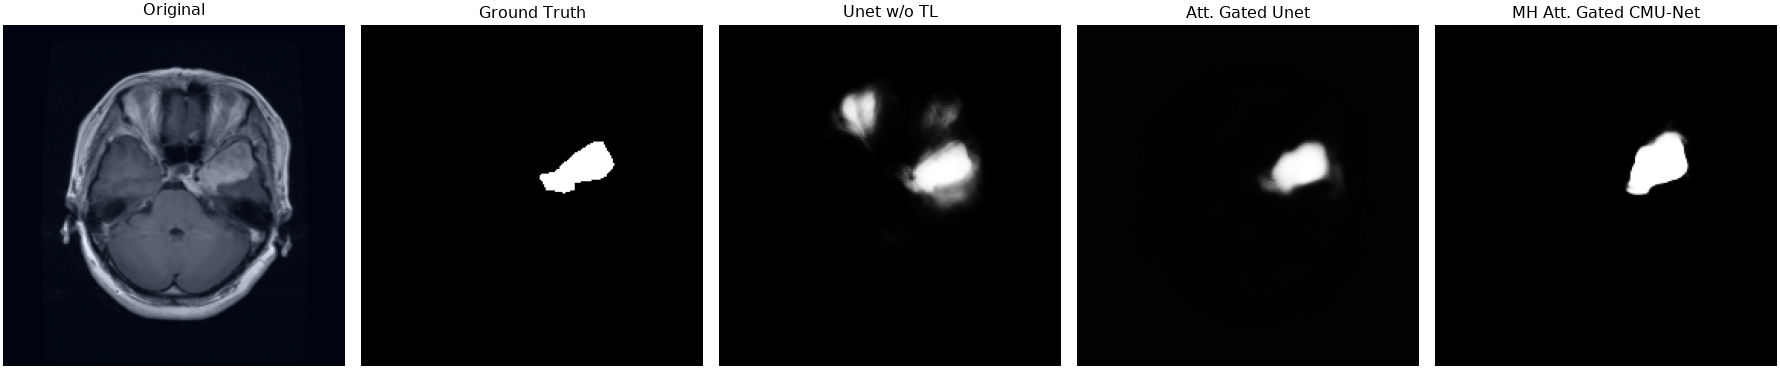

In [65]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

# Load the image
img = Image.open('saved_models/vanilla_unet_best_segmentation_wth_notum.pth_1.png')

# Coordinates of the squares in the format (left, upper, right, lower)
# Example coordinates for three squares, you need to replace these with actual values
l_off = 185
pic_gap = 62

u_off = 80

r_spic = 348
r_off = l_off + r_spic

lw_off = l_off + 240
squares = [
    (l_off, u_off, r_off, lw_off),  # Square 1
    (l_off+pic_gap+r_spic, u_off, r_off+pic_gap+r_spic, lw_off), # Square 2
    (l_off+pic_gap*2+r_spic*2, u_off, r_off+pic_gap*2+r_spic*2, lw_off)  # Square 3
]

combined_images = []
# List to store cropped images
cropped_images = []

# Cropping the images
for square in squares:
    cropped_img = img.crop(square)
    cropped_images.append(cropped_img)

# # Displaying and saving the cropped images
# for i, cropped_img in enumerate(cropped_images):
#     display(cropped_img)  # This will display the image in the Jupyter Notebook
#     # cropped_img.save(f'cropped_image_{i+1}.png')  # This will save the image to a file

Original = cropped_images[0]
Ground_Truth = cropped_images[1]
unet_wo_tl = cropped_images[2]

combined_images.append(Original)  # Original
combined_images.append(Ground_Truth)  # Ground Truth
combined_images.append(unet_wo_tl)  # unet_wo_tl

#######################
# adding attention unet with partial freeze with TL
######################

# Load the image
img = Image.open('saved_models/Attention_unet_best_segmentation_with_transLearn_cls_layer_3layer_freeze.pth_1.png')
squares = [
    (l_off+pic_gap*2+r_spic*2, u_off, r_off+pic_gap*2+r_spic*2, lw_off)  # Square 3
]

# List to store cropped images
cropped_images = []

# Cropping the images
for square in squares:
    cropped_img = img.crop(square)
    cropped_images.append(cropped_img)

att_gated_unet = cropped_images[0]
combined_images.append(att_gated_unet)  # unet_wo_tl

#######################
# adding proposed unet with partial freeze with TL
######################

# Load the image
img = Image.open('saved_models/Proposed_attention_unet_convmixer_best_segmentation_transferlrn.pth_1.png')
squares = [
    (l_off+pic_gap*2+r_spic*2, u_off, r_off+pic_gap*2+r_spic*2, lw_off)  # Square 3
]

# List to store cropped images
cropped_images = []

# Cropping the images
for square in squares:
    cropped_img = img.crop(square)
    cropped_images.append(cropped_img)

proposed_unet = cropped_images[0]
combined_images.append(proposed_unet)  # unet_wo_tl



# Define the labels for each image
labels = ['Original', 'Ground Truth', 'Unet w/o TL', "Att. Gated Unet", "MH Att. Gated CMU-Net"]

# Gap size in pixels between images and between label and image
image_gap = 10  # Gap between images
label_gap = 5   # Gap between label and the image

# Load a built-in PIL truetype font, typically DejaVuSans is available
font = ImageFont.truetype("dejavu-sans/DejaVuSans.ttf", 16)  # Larger font size


# Calculate required height for labels and gaps
label_height = max(font.getbbox(label)[3] for label in labels) + label_gap

# Create a new image with appropriate size to hold the concatenated images with gaps and labels
total_width = sum(img.width for img in combined_images) + image_gap * (len(combined_images) - 1)
max_height = max(img.height for img in combined_images) + label_height
combined_image = Image.new('RGB', (total_width, max_height), (255, 255, 255))  # White background

# Paste images and draw labels
x_offset = 0
y_offset = label_height  # Start below the space reserved for the label
for img, label in zip(combined_images, labels):
    # Drawing label
    draw = ImageDraw.Draw(combined_image)
    text_width, text_height = font.getbbox(label)[2:4]  # Get text width and height using textbbox
    draw.text(((x_offset + img.width // 2) - text_width // 2, y_offset - label_gap - text_height), label, font=font, fill='black')

    # Pasting image
    combined_image.paste(img, (x_offset, y_offset))
    x_offset += img.width + image_gap

# Display the combined image in the Jupyter Notebook
display(combined_image)


combined_image.save(f'combined_image_pic1.png') 